출처: https://www.kaggle.com/roshansharma/market-basket-analysis

# Apriori 알고리즘 사용

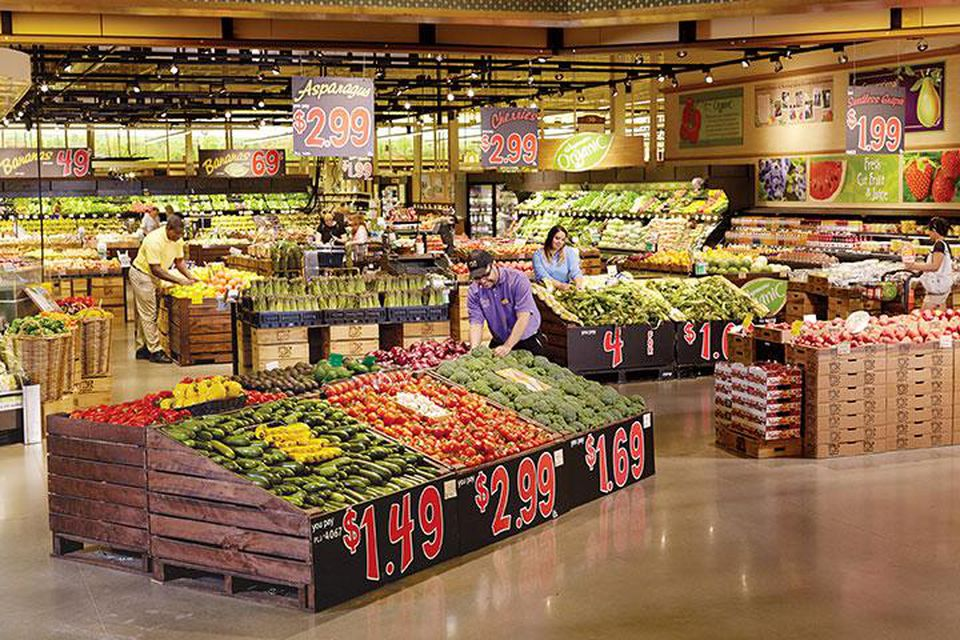

In [8]:
from IPython.display import Image
Image(filename="C:/Users/user/Jupyter_python/Kaggle/Market Basket Analysis/file/1.jpg")


Apriori Algorithm을 통한 Frequent Itemsets 연관 규칙 마이닝을위한 빈번한 아이템 셋 추출을위한 Apriori 기능 우리는 상점에서 다른 아이템을 구매하는 서로 다른 고객의 7500 트랜잭션이있는 쇼핑몰의 데이터 셋을 가지고 있습니다. 우리는 상점에있는 서로 다른 항목 간의 상관 관계를 찾아야합니다. 고객이 사과, 바나나, 망고를 구매하는지 알 수 있습니다. 다음 항목은 무엇입니까? 고객은 상점에서 구매하는 데 관심이있을 것입니다.

## 개요

Apriori는 연관 규칙 학습에서 응용 프로그램으로 빈번한 항목 집합을 추출하는 데 널리 사용되는 알고리즘입니다. apriori 알고리즘은 상점 고객의 구매와 같은 트랜잭션이 포함 된 데이터베이스에서 작동하도록 설계되었습니다. 항목 세트는 사용자가 지정한 지원 임계 값을 충족하는 경우 "빈번 함"으로 간주됩니다. 예를 들어 지원 임계 값이 0.5 (50 %)로 설정된 경우 빈번한 항목 집합은 데이터베이스에있는 모든 트랜잭션의 최소 50 %에서 함께 발생하는 항목 집합으로 정의됩니다.

In [58]:
!pip install squarify

In [63]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '../input/data/Market_Basket_Optimisation.csv'

In [54]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
print(os.listdir('C:/Users/user/Jupyter_python/Kaggle/Market Basket Analysis/data/Market_Basket_Optimisation.csv'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

NotADirectoryError: [WinError 267] 디렉터리 이름이 올바르지 않습니다: 'C:/Users/user/Jupyter_python/Kaggle/Market Basket Analysis/data/Market_Basket_Optimisation.csv'

## 데이터 세트 가져 오기

In [17]:
# reading the dataset

data = pd.read_csv('C:/Users/user/Jupyter_python/Kaggle/Market Basket Analysis/data/Market_Basket_Optimisation.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5728,cider,champagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,spinach,mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5794,pickles,antioxydant juice,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2559,grated cheese,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5451,burgers,grated cheese,shrimp,chocolate,french fries,champagne,cookies,mushroom cream sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6749,burgers,shrimp,whole wheat pasta,olive oil,eggs,cookies,energy drink,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2296,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7437,flax seed,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2316,eggs,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,sparkling water,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


## 데이터 시각화

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

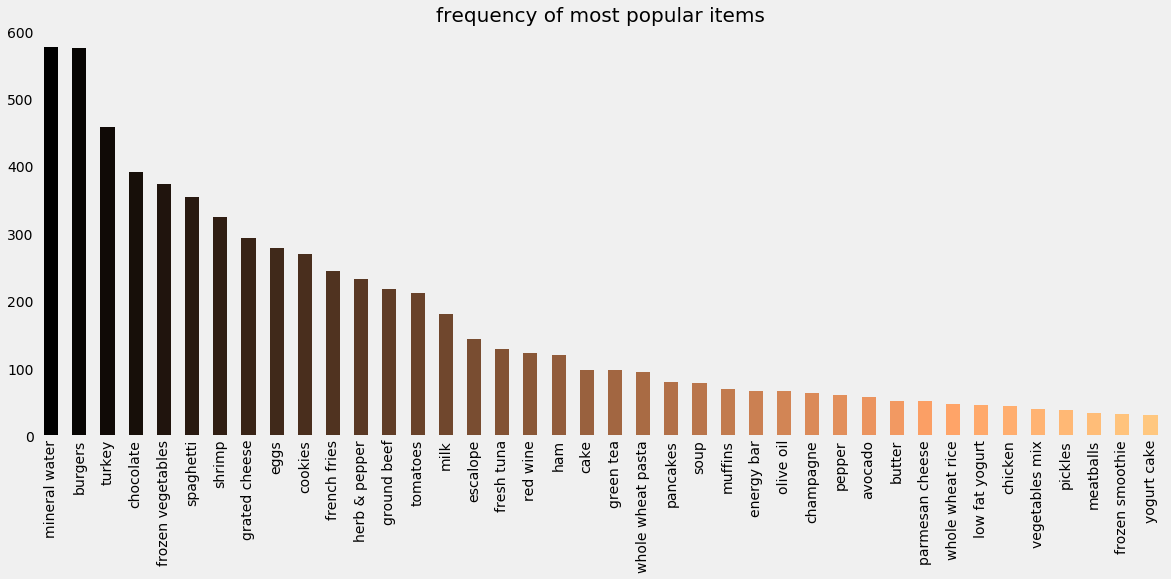

In [23]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [24]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'hot dogs', 'dessert wine', 'honey', 'cereals',
       'candy bars', 'strawberries', 'oil', 'yams', 'tomato sauce'],
      dtype='object')

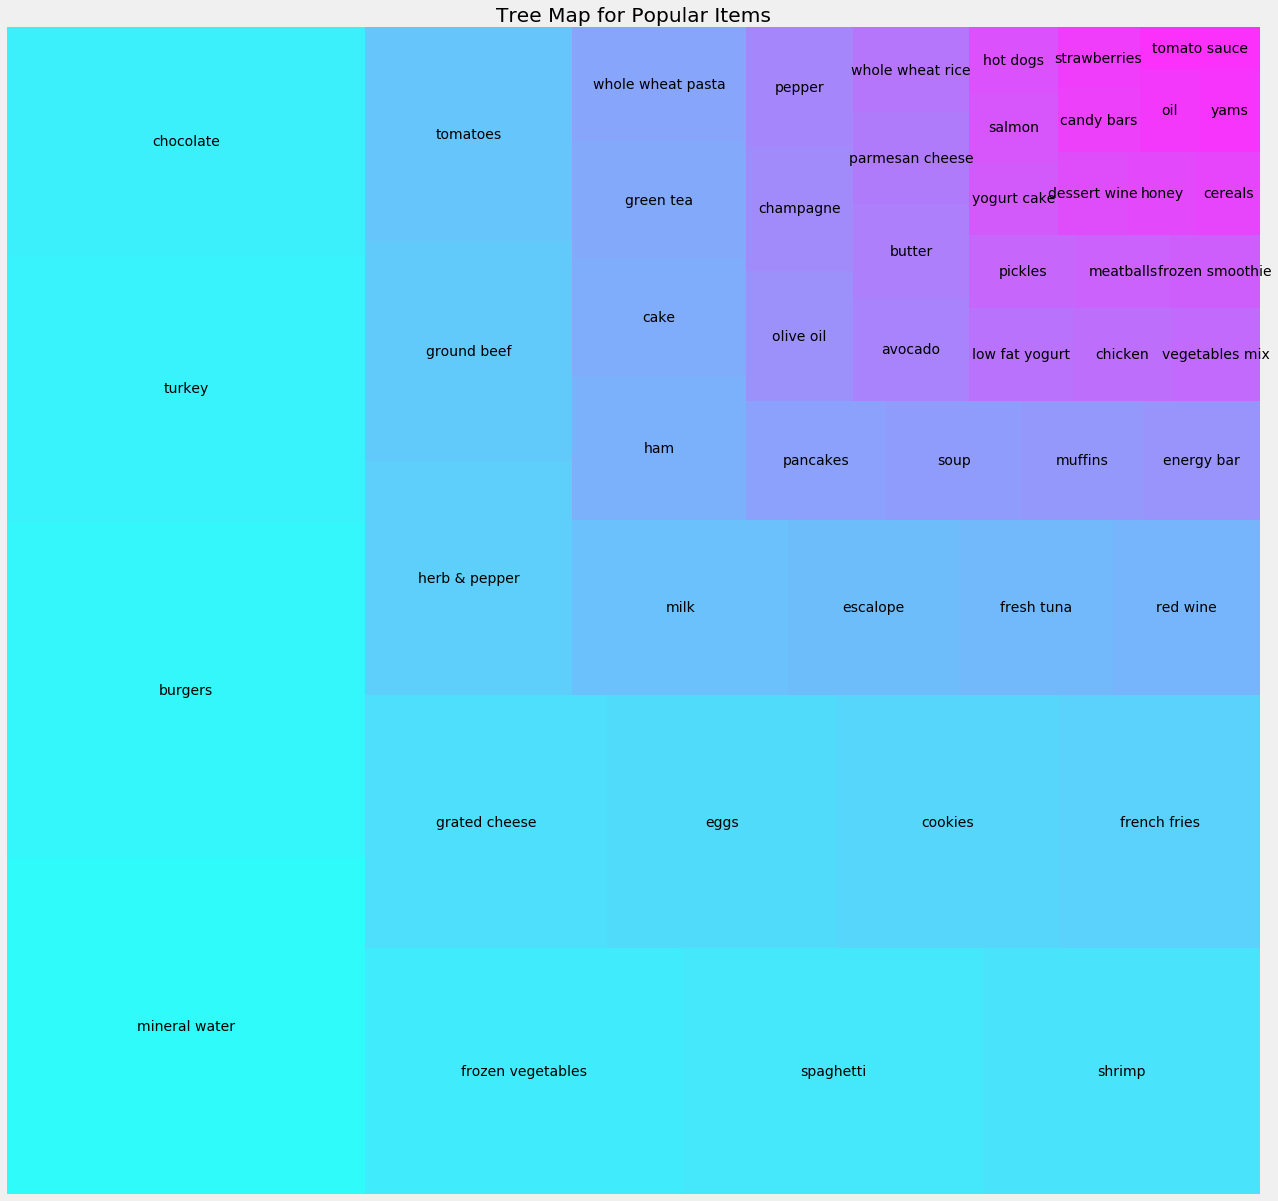

In [25]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [26]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

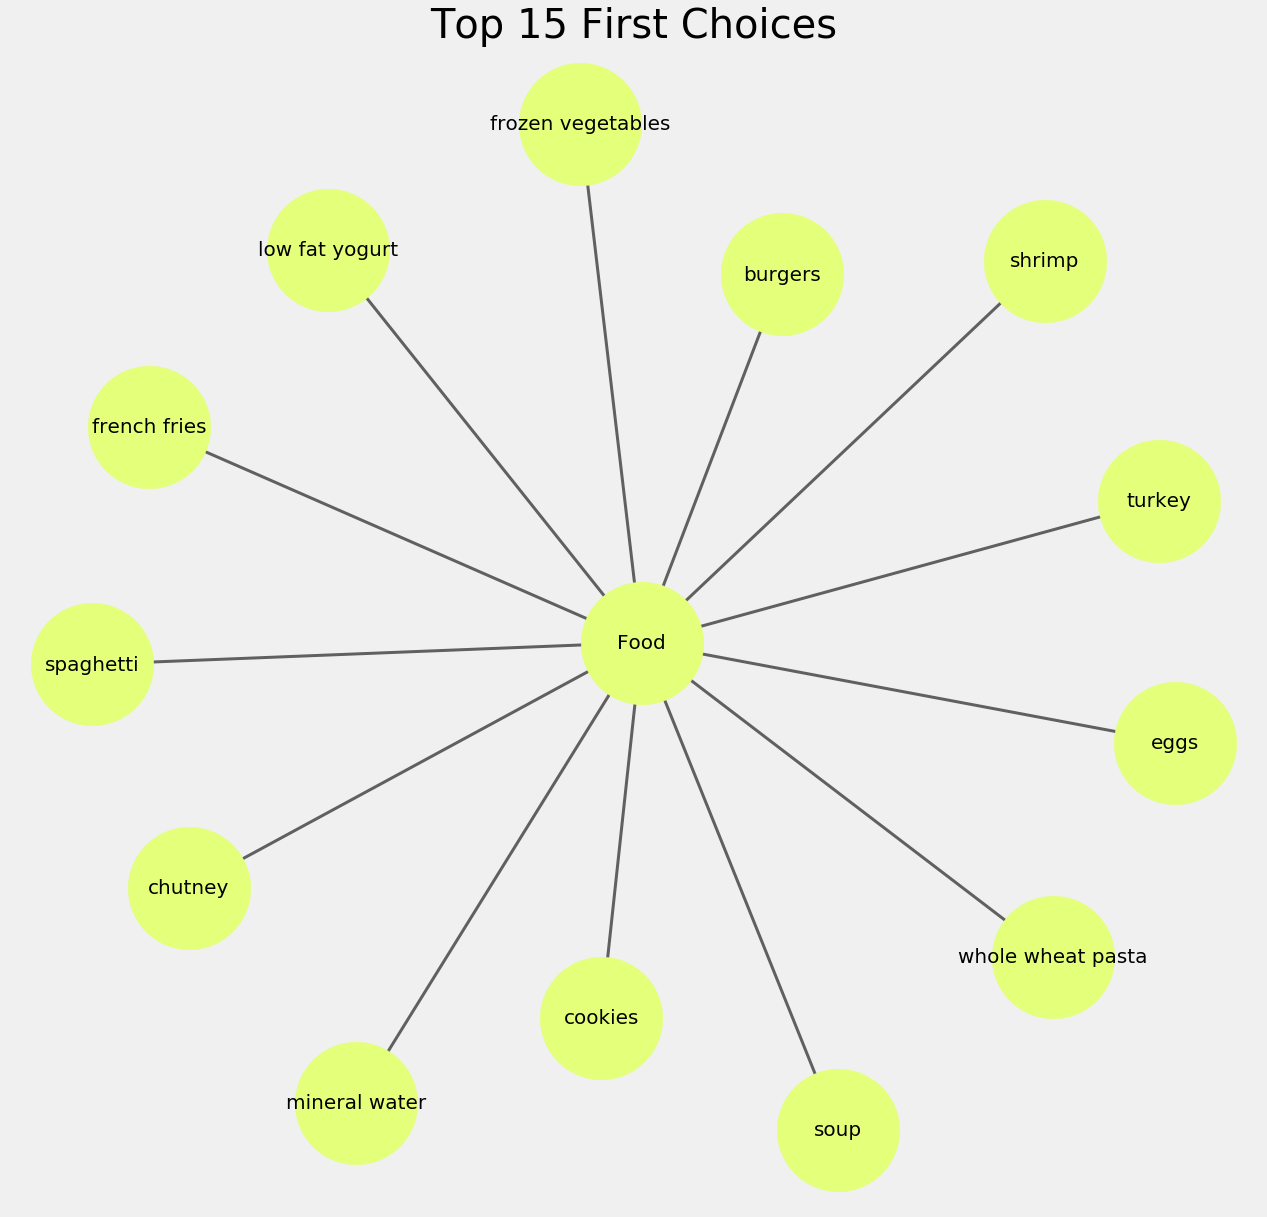

In [27]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [28]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

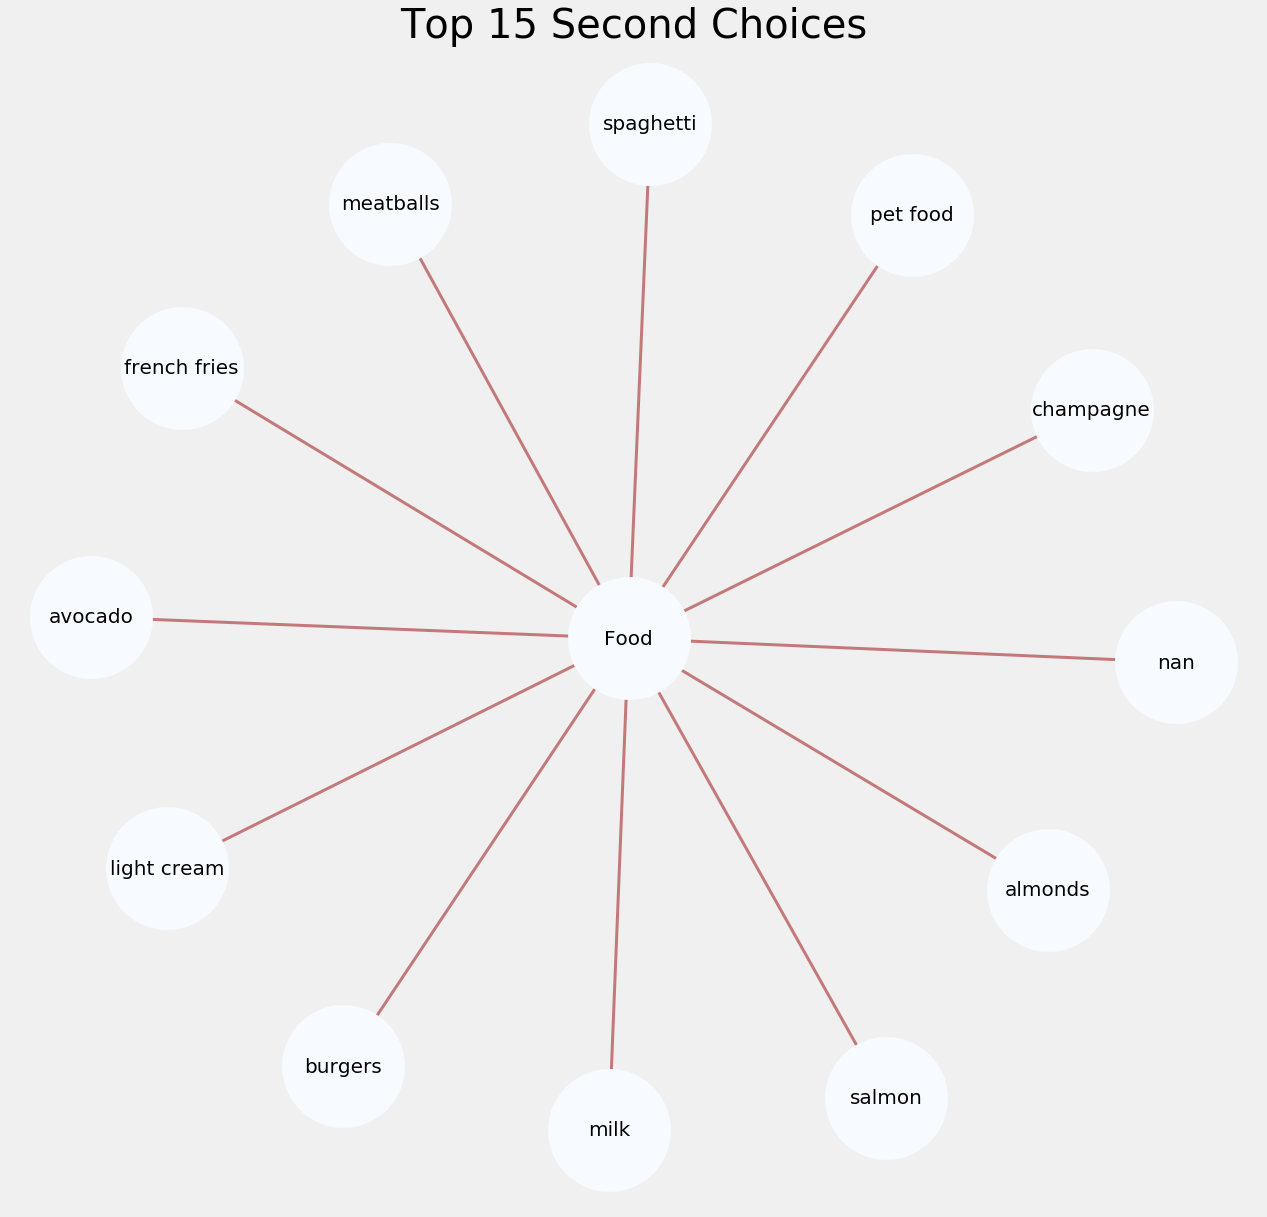

In [29]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [30]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

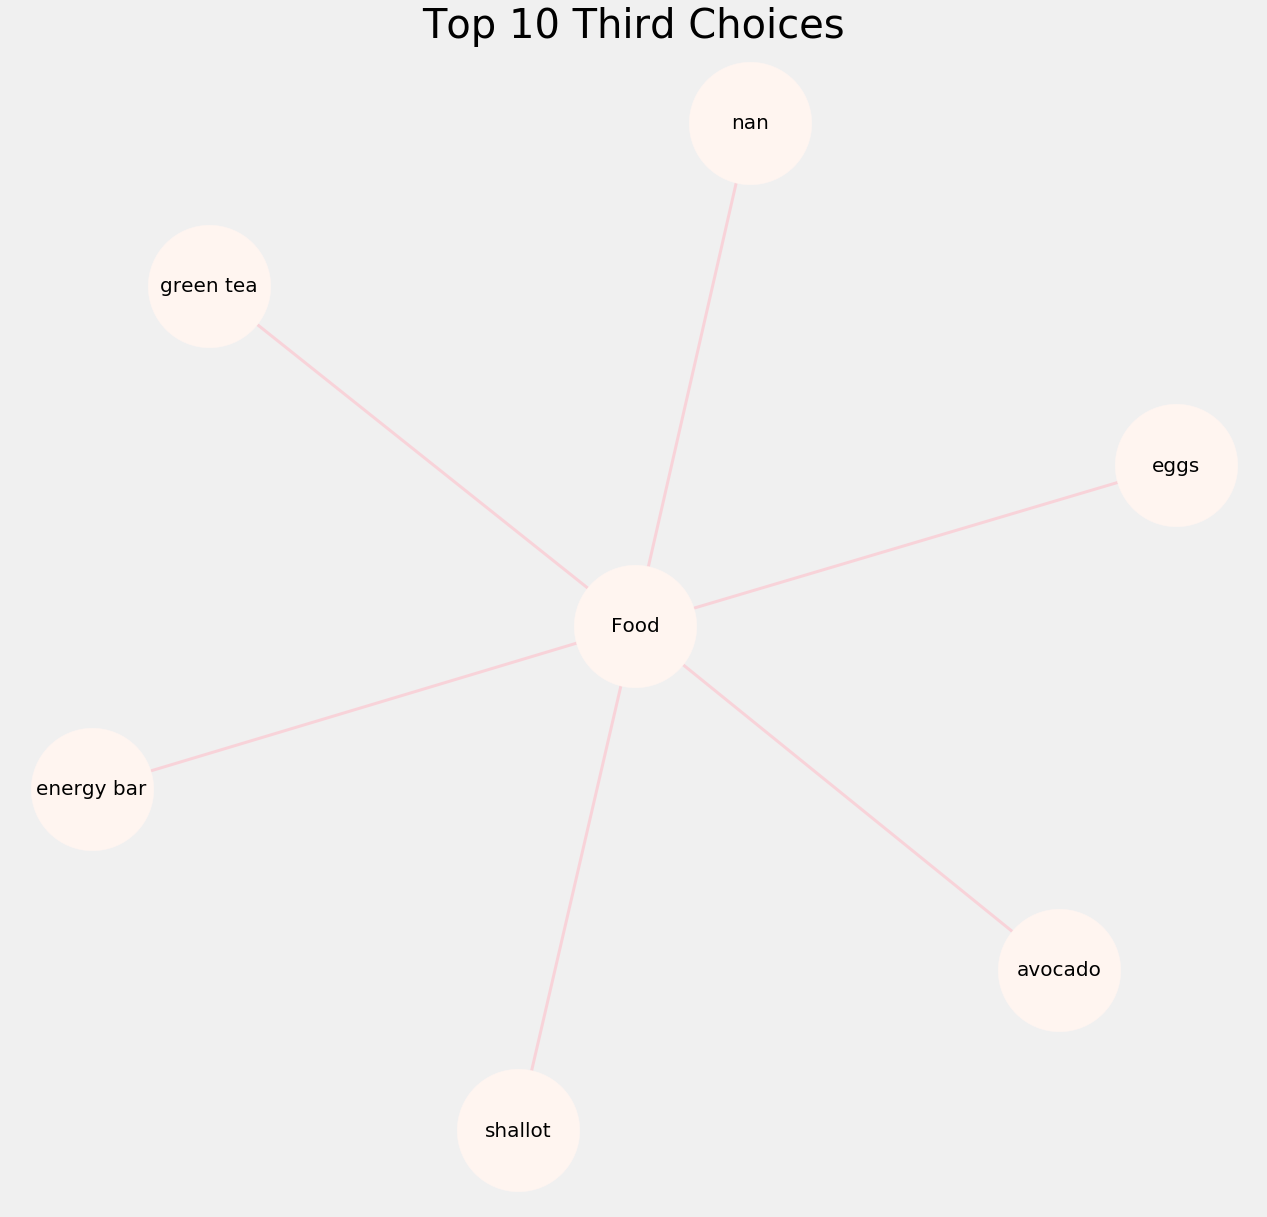

In [31]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

# 데이터 전처리

In [33]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


# 트랜잭션 인코더 사용

In [35]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

ModuleNotFoundError: No module named 'mlxtend'

In [36]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

KeyError: "None of [Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',\n       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',\n       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',\n       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',\n       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',\n       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',\n       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',\n       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',\n       'yogurt cake'],\n      dtype='object')] are in the [columns]"

In [37]:
# let's check the columns

data.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
               'food', 'secondchoice',  'thirdchoice'],
      dtype='object')

In [40]:
# getting the head of the data

data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,food,secondchoice,thirdchoice
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,Food,Second Choice,Third Choice
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice,Third Choice


# Apriori 적용

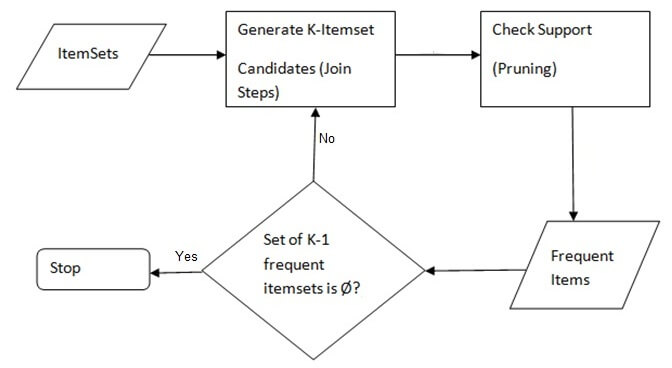

In [45]:
from IPython.display import Image
Image(filename="C:/Users/user/Jupyter_python/Kaggle/Market Basket Analysis/file/2.jpg")

# Apriori 알고리즘은 어떻게 작동합니까?
Apriori 알고리즘의 핵심 개념은 지원 측정의 반단 조성입니다. 그것은 가정합니다

- 빈번한 항목 집합의 모든 하위 집합은 빈번해야합니다.
- 마찬가지로, 드물게 발생하는 항목 집합의 경우 모든 상위 집합도 드물게 발생해야합니다.
<br>
<br>
**1 단계** : 모든 트랜잭션에서 발생하는 모든 항목의 빈도 표를 만듭니다.

**2 단계** : 지원이 임계 값 지원보다 크거나 같은 요소 만 중요하다는 것을 알고 있습니다.

**3 단계** : 다음 단계는 순서가 중요하지 않다는 점을 염두에두고 중요한 항목의 가능한 모든 쌍을 만드는 것입니다. 즉, AB는 BA와 동일합니다.

**4 단계** : 이제 모든 거래에서 각 쌍의 발생 횟수를 계산합니다.

**5 단계** : 지원 임계 값을 초과하는 항목 세트 만 중요합니다.

**6 단계** : 이제 함께 구매 한 세 가지 항목 세트를 찾고 싶다고 가정 해 보겠습니다. 5 단계에서 찾은 항목 세트를 사용하여 3 개의 항목 세트를 만듭니다.

In [41]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

ModuleNotFoundError: No module named 'mlxtend'


Pandas DataFrames로 작업 할 때의 장점은 편리한 기능을 사용하여 결과를 필터링 할 수 있다는 것입니다. 예를 들어, 최소 80 %의 지원이있는 길이 2의 항목 집합에만 관심이 있다고 가정 해 보겠습니다. 먼저, apriori를 통해 자주 사용되는 항목 집합을 만들고 각 항목 집합의 길이를 저장하는 새 열을 추가합니다.

In [42]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

NameError: name 'frequent_itemsets' is not defined

In [43]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

NameError: name 'frequent_itemsets' is not defined

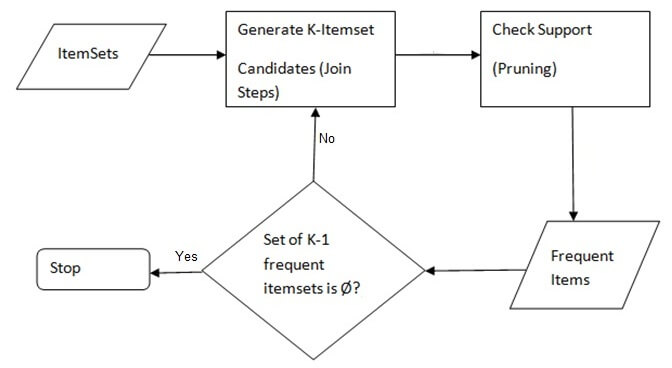

# 협회 채굴 

In [47]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

NameError: name 'frequent_itemsets' is not defined

In [48]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

NameError: name 'frequent_itemsets' is not defined

In [49]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'} ]

NameError: name 'frequent_itemsets' is not defined

In [50]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

NameError: name 'frequent_itemsets' is not defined

In [51]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

NameError: name 'frequent_itemsets' is not defined

In [52]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

NameError: name 'frequent_itemsets' is not defined